In [1]:
import os
import sys
import time
import io

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torch.utils.data as tdata
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tqdm.notebook import tqdm
import wandb

In [2]:
from anime_face_generator.config import PROCESSED_DATA_DIR, RAW_DATA_DIR, MODELS_DIR, FIGURES_DIR
import anime_face_generator.modeling.models.giga_unet_edited_ddpm_85M as Giga
from anime_face_generator.modeling.train import train_model

%load_ext autoreload
%autoreload 2

2025-08-13 23:14:55.822 | INFO     | anime_face_generator.config:<module>:11 - PROJ_ROOT path is: /home/ayoubvip/anime_face_generator


![Algorithm1](https://learnopencv.com/wp-content/uploads/2023/02/denoising-diffusion-probabilistic-models_DDPM_trainig_inference_algorithm-1024x247.png)

In [3]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print("number of GPUs:", torch.cuda.device_count())

Using device: cuda:1
number of GPUs: 2


## Data augmentation

In [4]:
transformers = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=Giga.ModelParams.im_size),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# dataset = torchvision.datasets.ImageFolder(root=PROCESSED_DATA_DIR, transform=transformers, target_transform=None)

In [5]:
rand_gen = torch.Generator().manual_seed(1978)

## Unet Denoiser Architecture

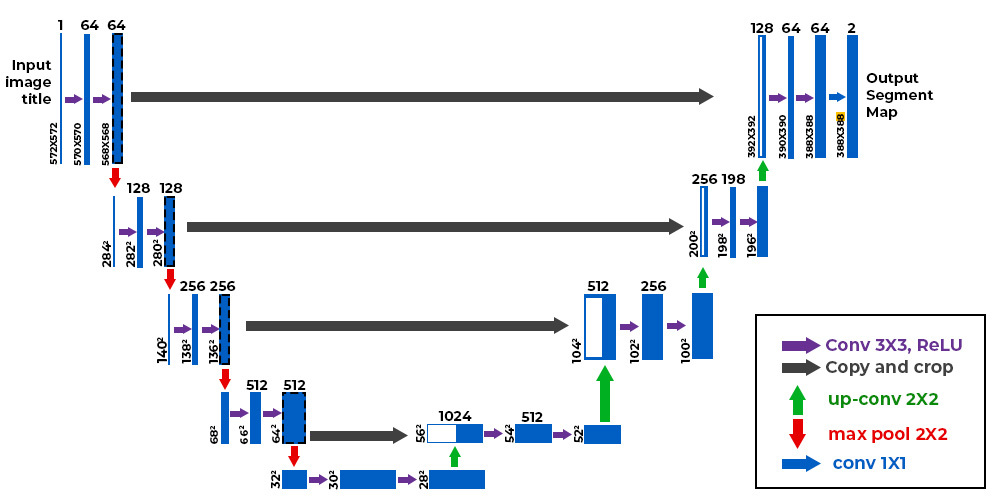

In [8]:
# model_backup = "mega_unet_ddpm_85M_ckpt_epoch_19.pth"
# giga_model_trained = train_model(module=Giga, dataset=dataset, device=device, rand_gen=rand_gen,
#                                  model_backup=model_backup, epoch_start=10, step_start= 111085, wandb_logs=True)

## Simpling from the learned distribution

In [5]:
def show_images_grid_rgb(samples, nrow=8, ncol=6, epoch=0):
    fig, axes = plt.subplots(ncol, nrow, figsize=(nrow, ncol))
    samples = (samples + 1) / 2         # Rescale from [-1, 1] to [0, 1]
    samples = samples.clamp(0, 1).cpu() # Ensure valid pixel range
    samples = samples.permute(0, 2, 3, 1)  #(N, H, W, C) for plotting

    idx = 0
    for row in range(ncol):
        for col in range(nrow):
            if idx == samples.shape[0]:
                break
            axes[row, col].imshow(samples[idx])
            axes[row, col].axis('off')
            idx += 1
    plt.tight_layout()
    plt.title(f"Giga in epoch{epoch}")
    fig_name = str(model_backup)[0:-4] + '_epoch_'+ str(epoch) +'_samples.png'
    plt.savefig(FIGURES_DIR / fig_name, format='png')
    plt.show()

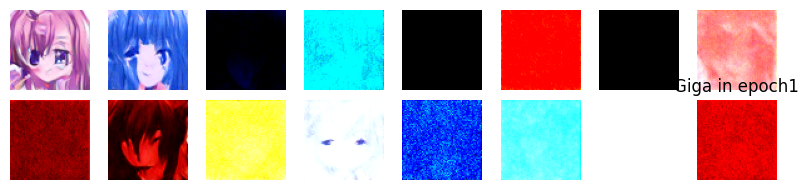

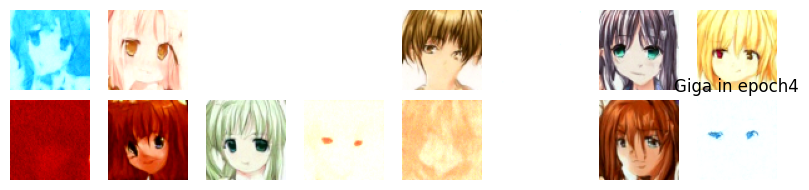

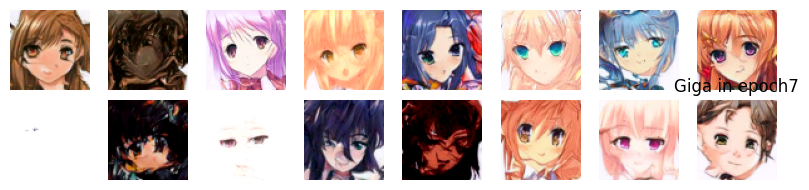

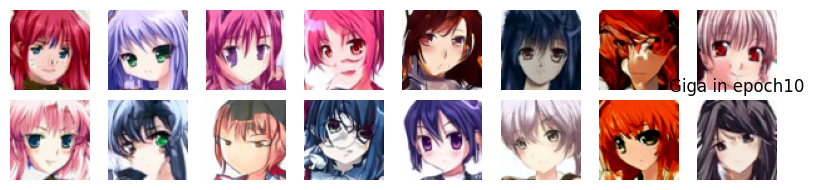

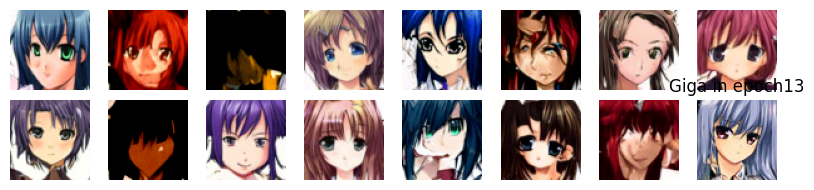

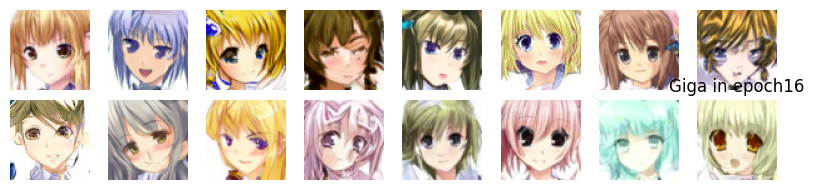

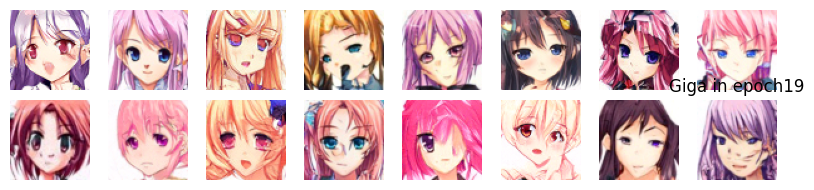

Number of trainable parameters: 84.96M


In [10]:
model = Giga.NoisePredictor()
reverse_diffusion = model.diffuser.reverse
name_pth = "85M_params_GIGA_DDPM_Unet_ckpt_epoch_"
for epoch in range(1,21,3):
    if epoch < 9:
        model_backup =  f"85M_params_GIGA_DDPM_Unet_ckpt_epoch_{epoch}.pth"
    else:
        model_backup =  f"giga_unet_ddpm_85M_ckpt_epoch_{epoch}.pth"
    # "mega_unet_ddpm_85M_ckpt_epoch_2.pth"
    model.load_parameters(path=MODELS_DIR / model_backup)

    model = model.to(device)
    samples = model.generate_samples(num_samples=16)
    show_images_grid_rgb(samples, nrow=8, ncol=2, epoch=epoch)

num_model_params = model.get_num_trainable_parameters()
print(f"Number of trainable parameters: {num_model_params / 1e6:.2f}M")

 ### Saving the notebook.

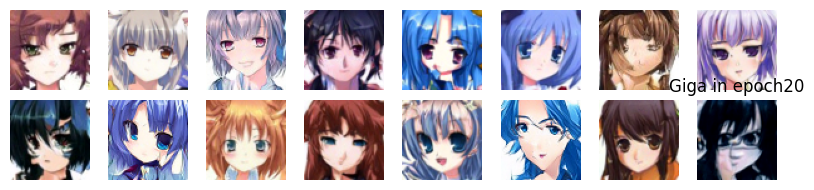

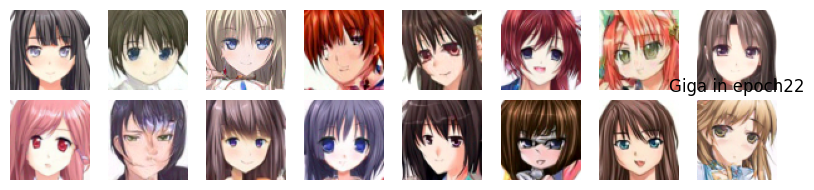

Number of trainable parameters: 84.96M


In [11]:
for epoch in [20, 22]:
    if epoch < 9:
        model_backup =  f"85M_params_GIGA_DDPM_Unet_ckpt_epoch_{epoch}.pth"
    else:
        model_backup =  f"giga_unet_ddpm_85M_ckpt_epoch_{epoch}.pth"
    # "mega_unet_ddpm_85M_ckpt_epoch_2.pth"
    model.load_parameters(path=MODELS_DIR / model_backup)

    model = model.to(device)
    samples = model.generate_samples(num_samples=16)
    show_images_grid_rgb(samples, nrow=8, ncol=2, epoch=epoch)

num_model_params = model.get_num_trainable_parameters()
print(f"Number of trainable parameters: {num_model_params / 1e6:.2f}M")

In [ ]:
from ipylab import JupyterFrontEnd
app = JupyterFrontEnd()
app.commands.execute('docmanager:save')